# Face-Recognition 
A face detector using Deep Learning with OpenCV 

## NOTE: You can skip this step 

## 1. Register face
Below steps are performed to collect the face samples of a person and save it in the database.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
#import required libraries
import cv2
import sys , os
import numpy as np
##############################################
#setting up the dataset files
# It captures images and stores them in datasets  
# folder under the folder name of sub_dir 
haar_file = 'haarcascade_frontalface_default.xml'
###############################################
# All the faces data will be 
#  present this folder  
# change the label here 
sub_dir = input('Enter Name to Register Face: ')
###############################################
# setting path for storing the images in train and test set
dataset='dataset'
train = 'dataset/train'  
validation='dataset/validation'

if not os.path.isdir(dataset): 
    os.mkdir(dataset) 

if not os.path.isdir(train): 
    os.mkdir(train) 

if not os.path.isdir(validation): 
    os.mkdir(validation) 

path1 = os.path.join(train, sub_dir) 
path2=os.path.join(validation, sub_dir) 
if not os.path.isdir(path1): 
    os.mkdir(path1) 
if not os.path.isdir(path2): 
    os.mkdir(path2) 
#################################################
# defining the size of images  
(width, height) = (400, 400)  
#################################################
#'0' is used for my webcam,  
# if you've any other camera 
#  attached use '1' like this 
face_cascade = cv2.CascadeClassifier(haar_file) 
webcam = cv2.VideoCapture(0) 
#################################################
# this function is created in order to avoid overwriting of images
# by keeping the count of the files already in the mentioned directory
def get_max(l):
    number = []
    for word in l:
        temp = ''
        for letter in word:
            if letter != '.':
                temp += letter
            else:
                break
        number.append(int(temp))

    return max(number)
#####################################################
# The program loops until it has 50 images of the face. 
path='dataset/train/'+sub_dir
if os.listdir(path):
    count = get_max(os.listdir(path))
else:
    count = 0

num_img = count + 160

split=0.8
mid=num_img//2
split_train=split*num_img
split_test=(1-split)*num_img

count = 1
while count < num_img:  
    (_, im) = webcam.read() 
    gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY) 
    faces = face_cascade.detectMultiScale(gray, 1.3, 4) 
    for (x, y, w, h) in faces: 
        cv2.rectangle(im, (x-20, y-20), (x + w+20, y + h+20), (0, 0, 0), 2) 
        face = gray[y:y + h, x:x + w] 
        face_resize = cv2.resize(face, (width, height)) 
    
        if count>mid and count <mid+split_test:
            cv2.imwrite('% s/% s.jpg' % (path2, count), face_resize)
        else:
            cv2.imwrite('% s/% s.jpg' % (path1, count), face_resize) 
    
        
        
      #  cv2.imwrite('% s/% s.jpg' % (path, count), face_resize) 
    count += 1
      
    cv2.imshow('OpenCV', im) 
    key = cv2.waitKey(10) 
    if key == 27: 
        break
webcam.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")
#######################################################

Enter Name to Register Face: shivani


______________________________________

## 2. Train on pretrained models 

### 2.1 Setup
Importing the required libraries

dataset at:  /content/drive/My Drive/Face-Recognition/dataset

In [18]:
from keras.layers import Lambda, Input, Flatten, Dense
from keras.models import Model
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.preprocessing import image
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [19]:
# resize all images
image_size = [224,224]

# path to train and test folders

# FOR COLAB

# train_path = '/content/drive/My Drive/Face-Recognition/dataset/train'
# val_path = '/content/drive/My Drive/Face-Recognition/dataset/validation'

#FOR LOCAL

train_path = 'dataset/train'
val_path = 'dataset/validation'


### 2.2 Fetching the pretrained model VGG16

In [13]:
# add preprocessing layer to the from of VGG
vgg = VGG16(
    input_shape = image_size + [3],
    weights = 'imagenet',
    include_top = False)

# freezing the above layers
for layer in vgg.layers:
  layer.trainable = False

Checking the number of classes present in the model to set softmax value

In [4]:
# useful for getting number of classes
dirs = glob('dataset/train/*')
print('Classes: ' + str(len(dirs)))

Classes: 2


### 2.3 Building the model

Adding a dense and activation layer to the pretrained model

In [15]:
# Adding layers
x = Flatten()(vgg.output)
prediction = Dense(len(dirs), activation = 'softmax')(x)

In [16]:
model = Model(inputs = vgg.input, output = prediction)

/home/theorangeguy/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  """Entry point for launching an IPython kernel.


Model Summary

In [17]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

Building step

In [18]:
# build the model
model.compile(
    loss = 'categorical_crossentropy',
    optimizer ='adam',
    metrics = ['accuracy']
)

### 2.4 Preprocessing 

In [19]:
# Setting up the Datagenrators

train_datagen = ImageDataGenerator(
    rescale=1./255.,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1/255)

training_set = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(
    val_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

Found 347 images belonging to 2 classes.
Found 56 images belonging to 2 classes.


### 2.5  Training the model

In [20]:
# Training the model 
history = model.fit_generator(
    training_set,
    validation_data = test_set,
    epochs = 4,
)

Epoch 1/4
11/11 [==============================] - 191s 17s/step - loss: 0.4516 - accuracy: 0.7435 - val_loss: 0.1236 - val_accuracy: 0.9821
Epoch 2/4
11/11 [==============================] - 135s 12s/step - loss: 0.1221 - accuracy: 0.9625 - val_loss: 0.0878 - val_accuracy: 1.0000
Epoch 3/4
11/11 [==============================] - 129s 12s/step - loss: 0.0585 - accuracy: 0.9827 - val_loss: 0.0299 - val_accuracy: 1.0000
Epoch 4/4
11/11 [==============================] - 128s 12s/step - loss: 0.0494 - accuracy: 0.9914 - val_loss: 0.0313 - val_accuracy: 1.0000


### 2.7 Saving the trained model

In [21]:
model.save('vgg_model1.h5')

### 2.6 Result Visualization 

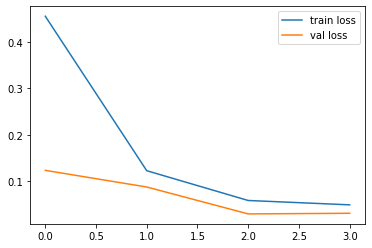

In [22]:
# Viewing the loss and accuracy

plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

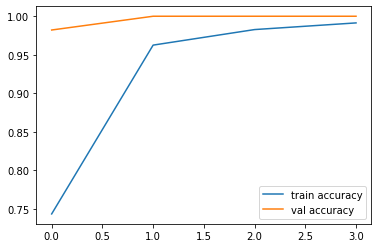

In [23]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

### Creating a scratch model

In [8]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from glob import glob


In [9]:
dirs = glob('dataset/train/*')
print('Classes: ' + str(len(dirs)))
num=len(dirs)
num

Classes: 7


7

In [10]:

train_path = 'dataset/train'
val_path = 'dataset/validation'


In [11]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    #after 6 layers we use flatten to create single vector along with activation function

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    

  #since it's a multi-class hence we'll use softmax activation function.

    tf.keras.layers.Dense(num, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 16)      448       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 220, 220, 16)      2320      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 110, 110, 16)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 108, 108, 32)      4640      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 106, 106, 32)      9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 53, 53, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 51, 51, 64)       

In [12]:
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',metrics=['accuracy'])


In [13]:
train_datagen = ImageDataGenerator(
    rescale=1./255.,
      shear_range=0.2,
      horizontal_flip=True,
)

test_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory(
    val_path,
    target_size = (224,224),
    batch_size = 10,
    class_mode = 'categorical')



Found 1040 images belonging to 7 classes.
Found 193 images belonging to 7 classes.


In [14]:
history = model.fit(
      train_generator,
    steps_per_epoch=32,
      epochs=5,
    validation_steps=20,
      validation_data=validation_generator)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - ETA: 0s - loss: 1.1895 - accuracy: 0.4961WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff5d4377510> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the 

In [15]:
model.save('hyp.h5')

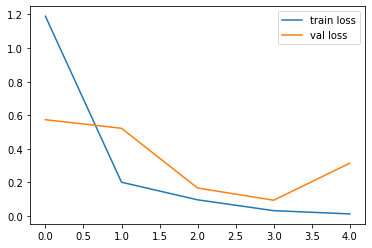

In [16]:
plt.plot(history.history['loss'], label = 'train loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.legend()
plt.show()

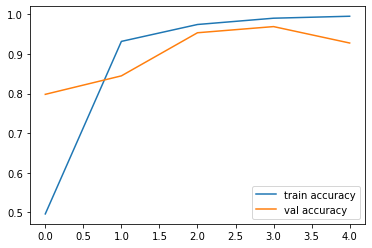

In [17]:
plt.plot(history.history['accuracy'], label = 'train accuracy')
plt.plot(history.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.show()

## Load Saved Model

In [18]:
from tensorflow.keras.models import load_model

VGG-16


In [19]:
#model = load_model('vgg_model1.h5')

Scratch Model

In [20]:
model = load_model('hyp.h5')

## 3. Testing the model

### 3.1 Setup

In [21]:
from PIL import Image
from keras.applications.vgg16 import preprocess_input
import base64
from io import BytesIO
import json 
import random 
import cv2
import numpy as np
from keras.preprocessing import image
import os

Using TensorFlow backend.


In [22]:
# For naming the classes
l_ = []
for f in os.listdir('dataset/train/'):
    l_.append(f.upper())

l_ = sorted(l_)
people = {}
for i,person in enumerate(l_):
    people[i] = person.title()
people

{0: 'Mehboob',
 1: 'Mohan',
 2: 'Person1',
 3: 'Person2',
 4: 'Person3',
 5: 'Shivani',
 6: 'Shubham'}

In [23]:
# Loading the cascade
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# Testing
video_capture = cv2.VideoCapture(0)
while True:
    _, frame = video_capture.read()
    cropped_face=None
#     face=face_extractor(frame)
    faces = face_cascade.detectMultiScale(frame, 1.3, 4)  
    if faces is ():
        face= None  
    # Crop all faces found
    for (x,y,w,h) in faces:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(0,200,0),2)
        cropped_face = frame[y:y+h, x:x+w]
    face=cropped_face
        
        
    cv2.putText(frame,"Press 'q' to quit", (30, 30), cv2.FONT_HERSHEY_DUPLEX, 0.6, (0,0,0), 2)
    
    if type(face) is np.ndarray:
        face = cv2.resize(face, (224, 224))
        im = Image.fromarray(face)
        img_array = np.array(im)
        img_array = np.expand_dims(img_array, axis=0)
        pred = model.predict(img_array)
        
        for i in range(len(pred[0])):
            if pred[0][i]==max(pred[0]):
                idx=i
        name=people.get(idx)
        print(pred)
#         idx = np.argmax(pred,axis=1)[0]
#         name="None matching"
#         name = people[idx]
            
        cv2.putText(frame,name, (x, y-7), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,200,0), 2)
    else:
        for (x,y,w,h) in faces:
            cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,220),2)
            cropped_face = frame[y:y+h, x:x+w]
        face=cropped_face
        name='Try to keep your face straight in the frame!'
        cv2.putText(frame,name, (0,400), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0,0,220), 2)
    cv2.imshow('Video', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
video_capture.release()
cv2.destroyAllWindows()


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: Bad argument number for Name: 4, expecting 3
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0.

[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
[[0. 1. 0. 0. 0. 0. 0.]]
